# K-Means Clustering

### Problem Statement:- 

    - Analyze the information given in the ‘Insurance Policy dataset’ to create clusters of persons falling in 
    the same type


### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform Hierarchical clustering
from sklearn.cluster import KMeans

In [3]:
insurance = pd.read_csv("Insurance Dataset.csv")
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [4]:
#Checking missing values.
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Premiums Paid    100 non-null int64
Age              100 non-null int64
Days to Renew    100 non-null int64
Claims made      100 non-null float64
Income           100 non-null int64
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [5]:
insurance.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


### Data Visualization

<Figure size 1440x1440 with 0 Axes>

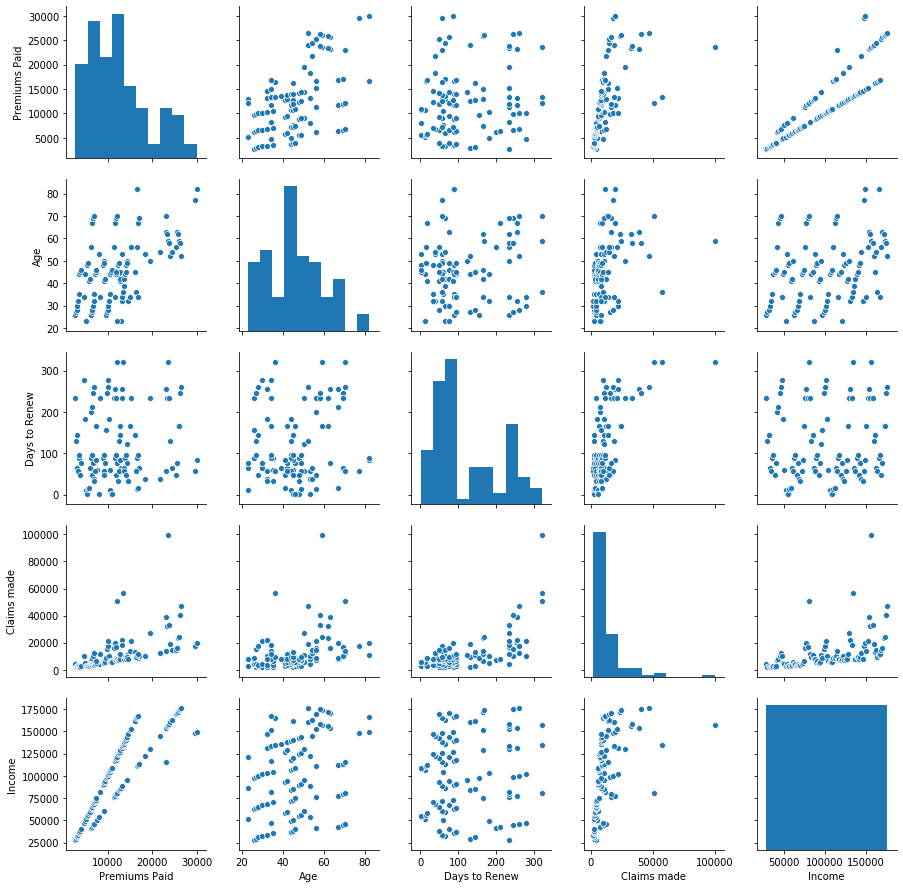

In [6]:
plt.figure(figsize=(20,20))
sns.pairplot(insurance)
plt.show()

### Normalizing

Before applying K -Means Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

In [7]:
from sklearn.preprocessing import normalize
insurance_scaled = normalize(insurance)

In [8]:
insurance_scaled = pd.DataFrame(data=insurance_scaled, columns=insurance.columns)
insurance_scaled.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.098563,0.000915,0.008202,0.136935,0.985630
1,0.099206,0.000908,0.004372,0.077160,0.992061
2,0.099167,0.000896,0.004606,0.082038,0.991672
3,0.099321,0.000917,0.001986,0.060457,0.993215
4,0.099332,0.000935,0.001636,0.058696,0.993320


In [9]:
insurance_scaled.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.117605,0.000538,0.001451,0.113165,0.982208
std,0.025936,0.000303,0.001463,0.086413,0.023949
min,0.091703,0.000189,0.000009,0.049827,0.837533
25%,0.099286,0.000323,0.000481,0.062182,0.981512
50%,0.099341,0.000422,0.000967,0.082412,0.990941
75%,0.145287,0.000698,0.001745,0.136066,0.993110
max,0.194812,0.001517,0.008202,0.531739,0.993801


### Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

    - If the value is between {0.01, ...,0.3}, the data is regularly spaced.
    - If the value is around 0.5, it is random.
    - If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.



In [10]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [11]:
hopkins(insurance_scaled)

0.9811869807985533

Since Hopkins Statistic is between {0.7, ..., 0.99}, data has a high tendency to cluster.

### Elbow curve to find out the number of clusters

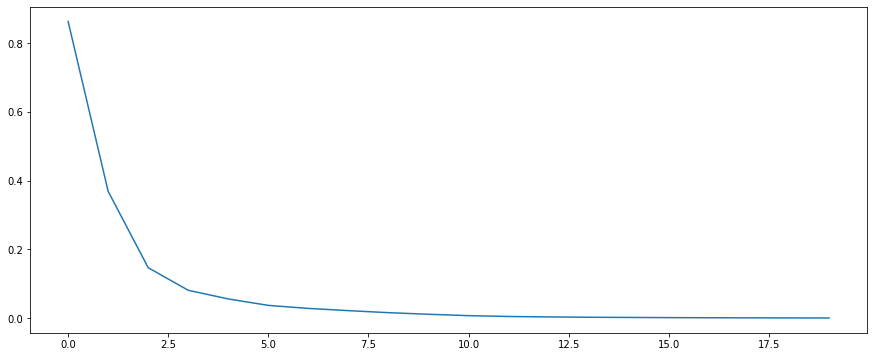

In [12]:
# sum of squared distances
plt.figure(figsize=(15,6))
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(insurance_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

### Building the Model

In [13]:
# Selecting 3 clusters from the above screen plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(insurance_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

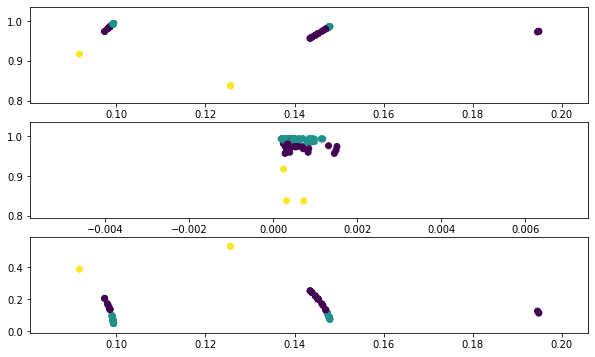

In [14]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.scatter(insurance_scaled['Premiums Paid'], insurance_scaled['Income'], c=model.labels_) 

plt.subplot(3,1,2)
plt.scatter(insurance_scaled['Age'], insurance_scaled['Income'], c=model.labels_) 

plt.subplot(3,1,3)
plt.scatter(insurance_scaled['Premiums Paid'], insurance_scaled['Claims made'], c=model.labels_) 


plt.show()

In [15]:
cluster_labels=pd.Series(model.labels_)
insurance["Cluster_ID"] = cluster_labels # creating a  new column and assigning it to new column 
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,Cluster_ID
0,2800,26,233,3890.076336,28000,0
1,2950,27,130,2294.444444,29500,1
2,3100,28,144,2564.545455,31000,1
3,3250,30,65,1978.260870,32500,1
4,3400,32,56,2009.090909,34000,1


In [16]:
# getting aggregate mean of each cluster
insurance_ave = insurance.groupby("Cluster_ID").mean().reset_index()

In [17]:
insurance_ave.head()

,Cluster_ID,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0,15645.535714,53.321429,215.285714,19931.264579,109803.571429
1,1,11117.028986,42.797101,73.173913,7132.045475,98239.130435
2,2,16358.333333,55.000000,321.000000,69237.596900,124000.000000


In [18]:
# creating a csv file 
insurance_ave.to_csv("insurance.csv",encoding="utf-8")

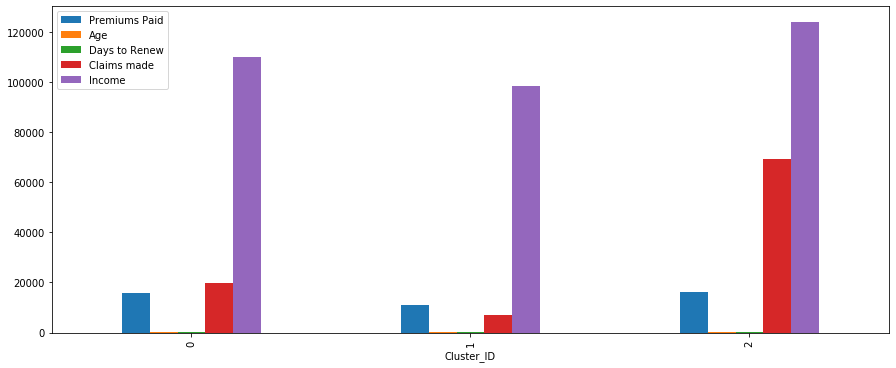

In [19]:
#plotting barplot for all 5 clusters

insurance_ave.plot(x="Cluster_ID", y=["Premiums Paid","Age","Days to Renew","Claims made", "Income"], kind="bar", figsize=(15,6))

### Conclusion:- 

    - As per Hopkins Statistics the data is tendency to clustering.
    - As per Elbow curve, the optimal clusters are 3